# ***Alzheimer's Disease Classification***

**OBJECTIVE:** The variable to be predicted is the Diagnosis status (0 = No Alzheimer's, 1 = Alzheimer's).

Therefore, this is a Classification project.

The primary goal is to analyze patient demographic, lifestyle, medical, clinical, and cognitive variables to understand factors associated with Alzheimer's Disease and build models that can predict the likelihood of diagnosis.


**PROBLEM STATEMENT:** Alzheimer’s Disease diagnosis depends on multiple interacting factors such as age, lifestyle, medical history, clinical measurements, and cognitive assessments. Identifying the most influential variables and understanding their patterns is essential for early detection and effective intervention.

# SECTION 1: Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("alzheimers_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


# Section 2 — Dataset Overview

This section checks:
- Shape of data
- Columns & data types
- Duplicate rows
- Basic statistical summary


In [3]:
print("Shape:", df.shape)

Shape: (2149, 35)


In [4]:
print("\nColumn List:\n", df.columns.tolist())


Column List:
 ['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis', 'DoctorInCharge']


In [5]:
print("\nDataset Info:")
df.info()
df.describe().T


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 n

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


## Interpretation: Data Overview
- The dataset contains **2,149 rows and 35 columns**, meaning we have a large number of features covering demographics, lifestyle, medical history, cognitive assessments, and symptoms.
- There are **no missing values**, which makes data cleaning easier.
- Most columns are **numeric**, except `DoctorInCharge`, which does not add analytical value.
- All features have valid ranges and datatypes, indicating the dataset is clean and ready for analysis.


# Section 3 - Check Duplicates

## Checking for Duplicate Records
Duplicates can distort analysis. We check and remove them if found.


In [6]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()


Number of duplicate rows: 0


## Checking for Missing values

In [7]:
missing = df.isnull().sum().sort_values(ascending=False)

In [8]:
print("\nMissing Values Count:")
print(missing[missing > 0])


Missing Values Count:
Series([], dtype: int64)


## Dropping Irrelevant Columns
- `DoctorInCharge` is constant ("XXXConfid") → no predictive value.


In [9]:
df = df.drop(columns=['DoctorInCharge'])


## Numerical and Categorical Columns Identification

In [10]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = [c for c in df.columns if df[c].nunique() <= 20 and c not in num_cols]
print("\nNumeric Columns:", len(num_cols))
print("\nCategorical-like Columns:", cat_cols)


Numeric Columns: 34

Categorical-like Columns: []


## Interpretation: Duplicate Records
- The output shows **0 duplicate rows**, meaning the dataset does not contain repeated entries.
- This confirms data quality is good and no removal is needed at this stage.

## Interpretation: Dropping Irrelevant Column
- The column `DoctorInCharge` has the same value ("XXXConfid") for all patients.
- Since it provides **no useful information for analysis or prediction**, it is safely removed.


# Section 4 — Univariate Analysis (Numeric)

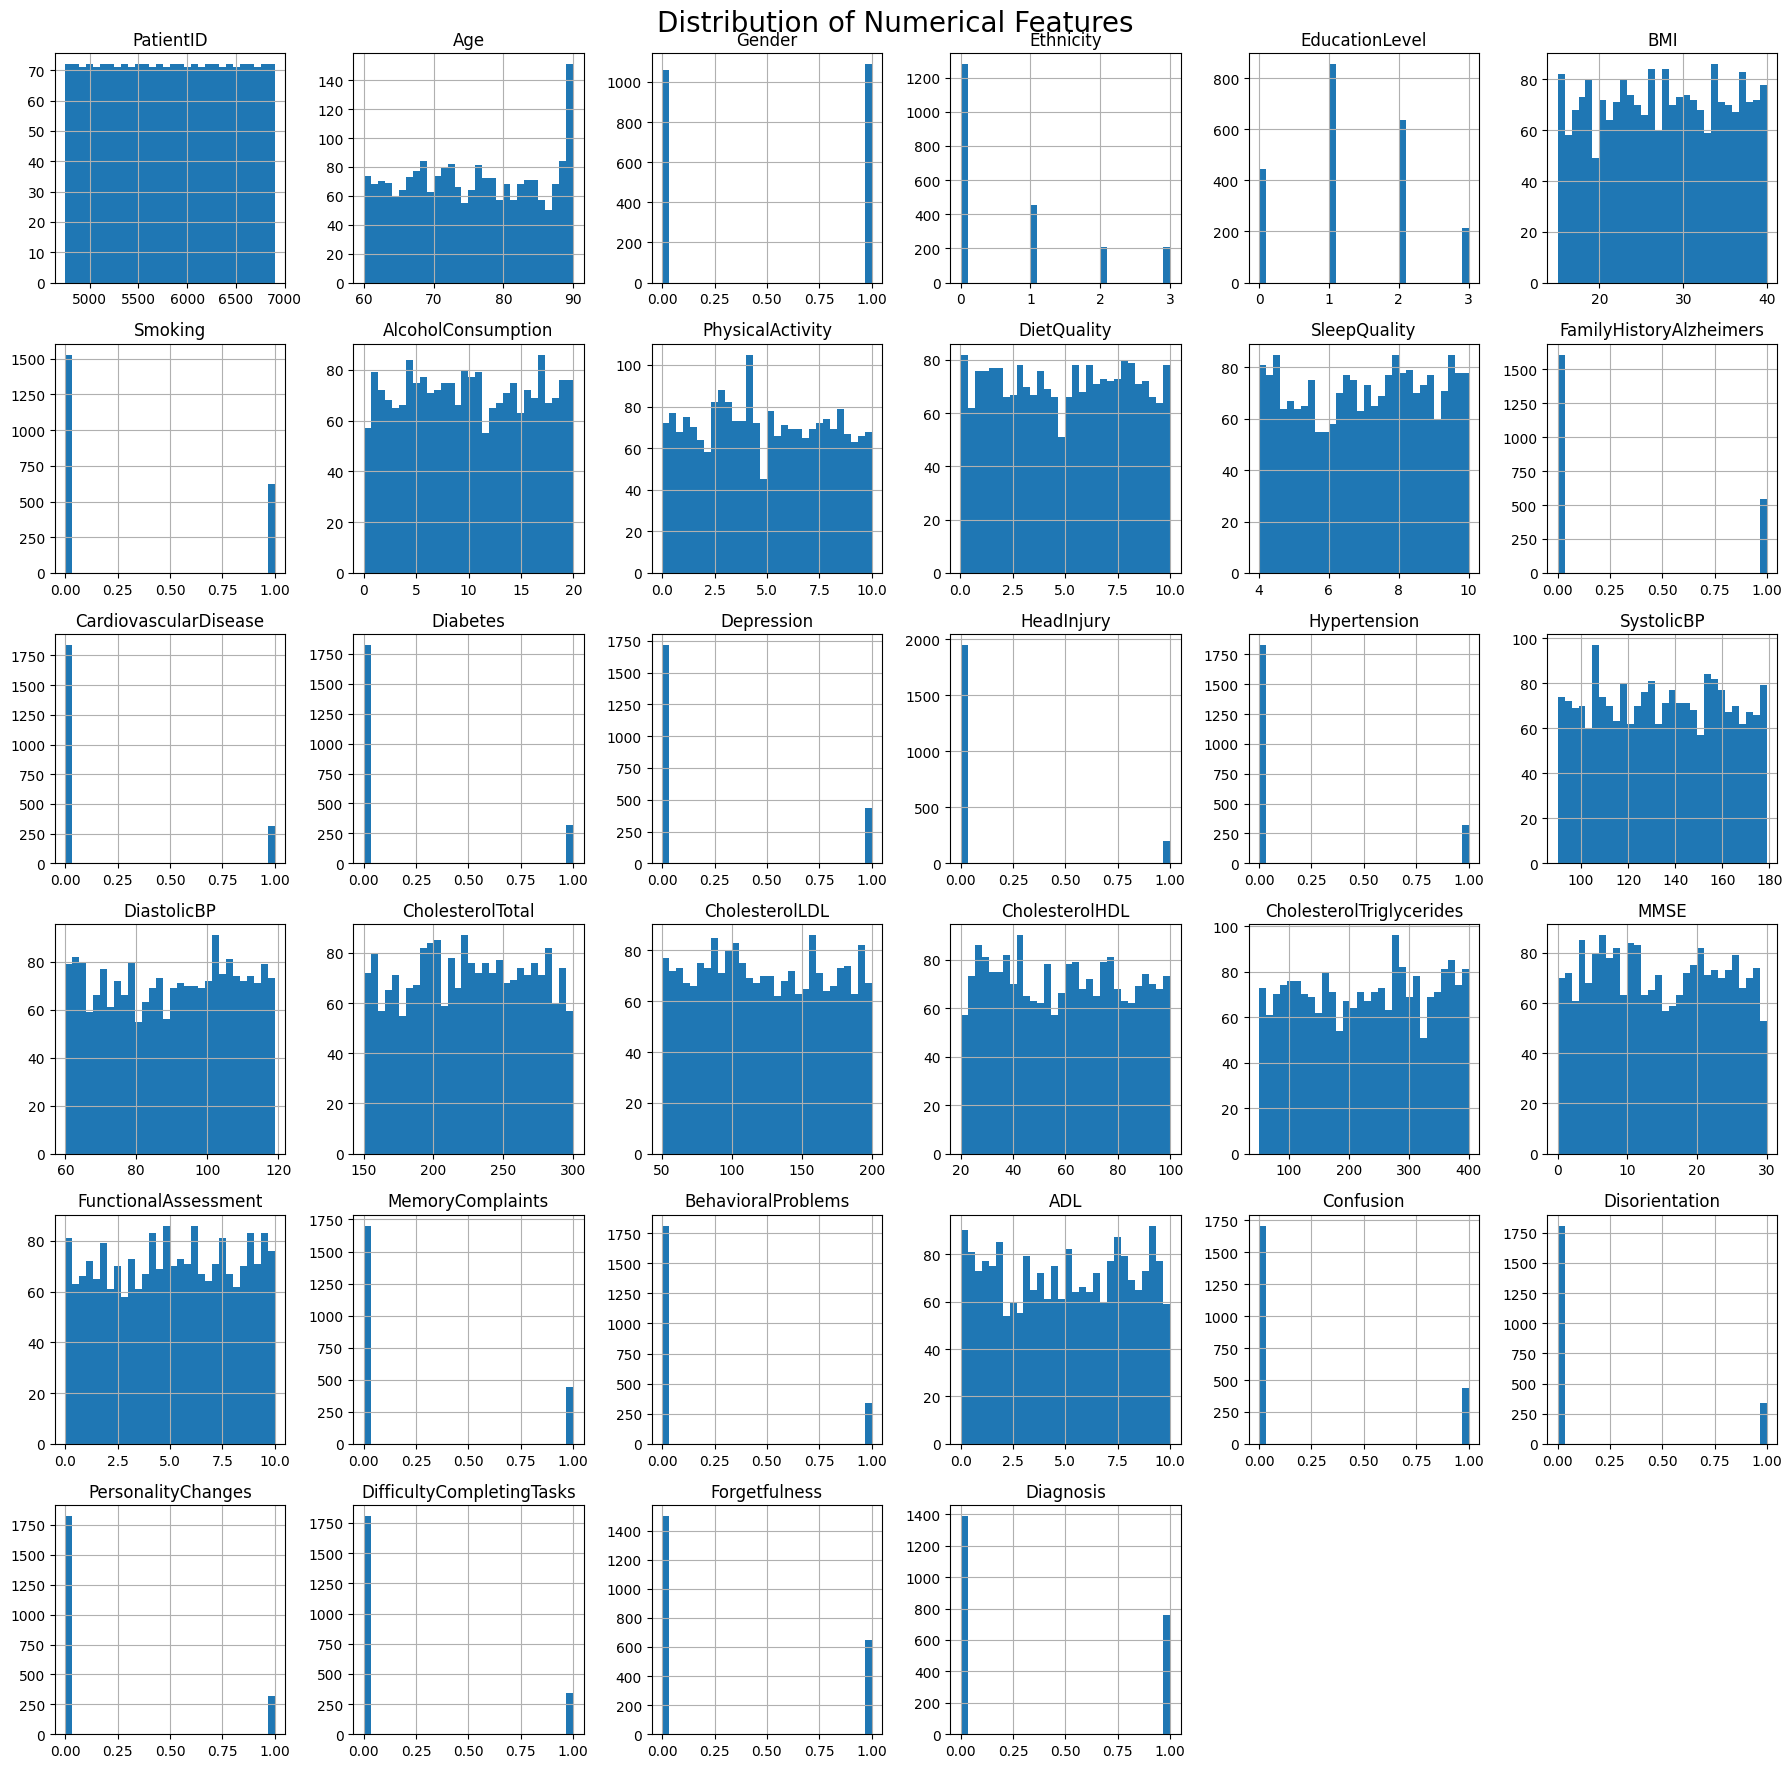

In [11]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

df[numeric_cols].hist(figsize=(18, 18), bins=30)
plt.suptitle("Distribution of Numerical Features", fontsize=20)
plt.tight_layout()
plt.show()


## Interpretation: Numeric Feature Distributions
- Most numerical variables show **normal or slightly skewed distributions**.
- No extreme abnormalities or strange patterns are seen, meaning the data is realistically distributed.
- These plots help us understand variability and detect potential outliers.


# Section 5 — Categorical Feature Distribution
We check counts of each categorical variable.


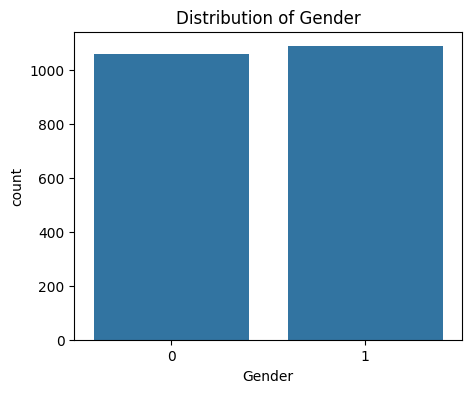

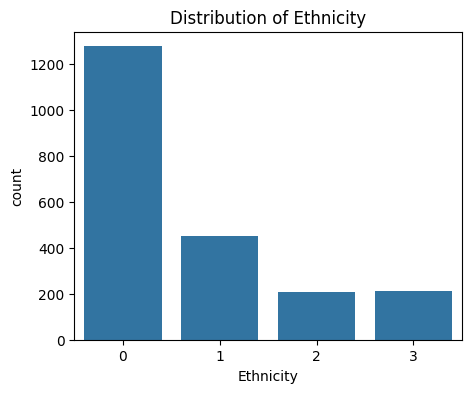

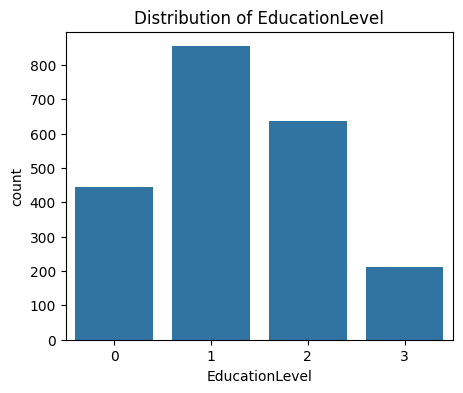

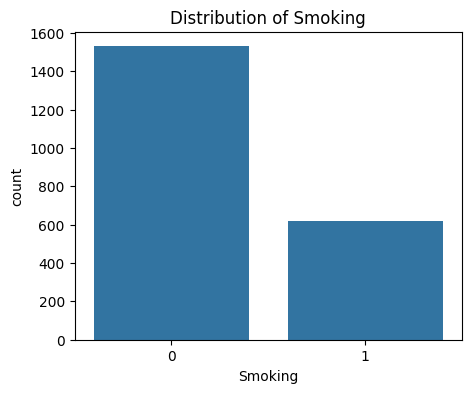

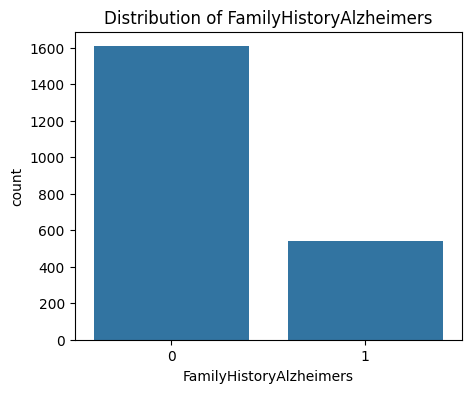

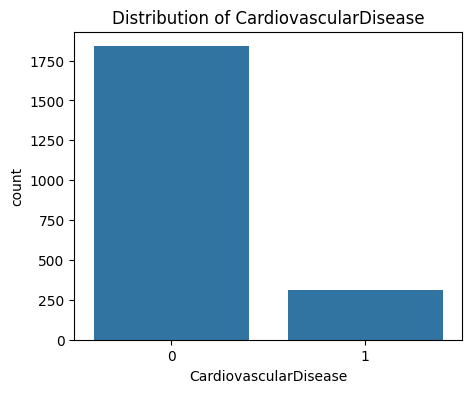

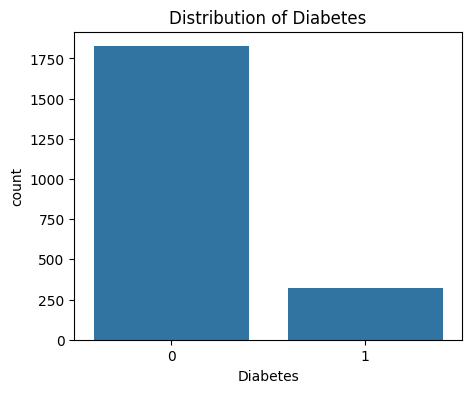

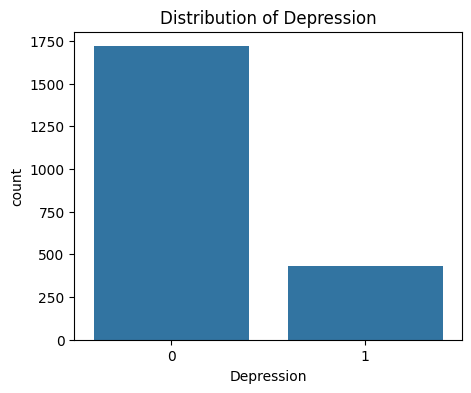

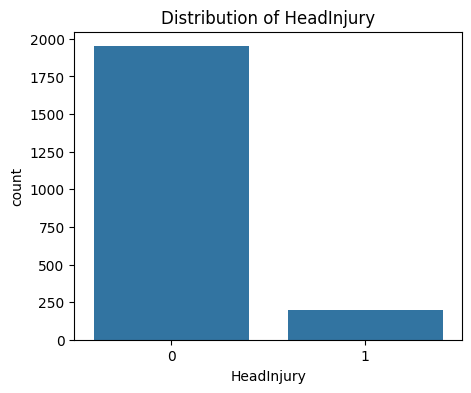

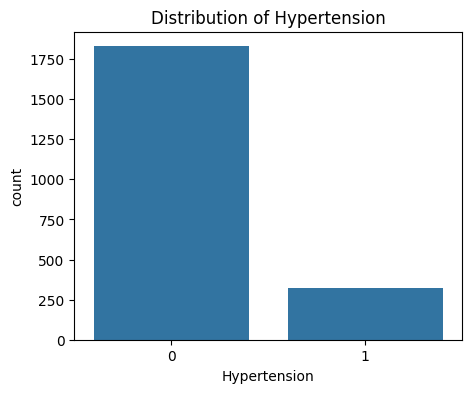

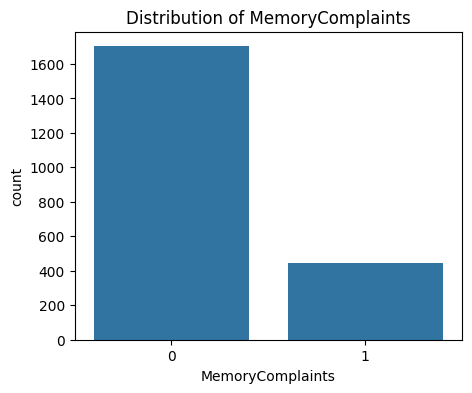

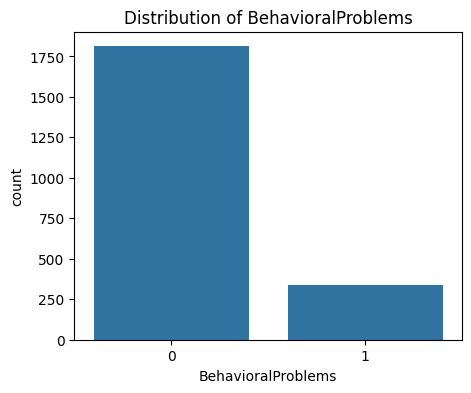

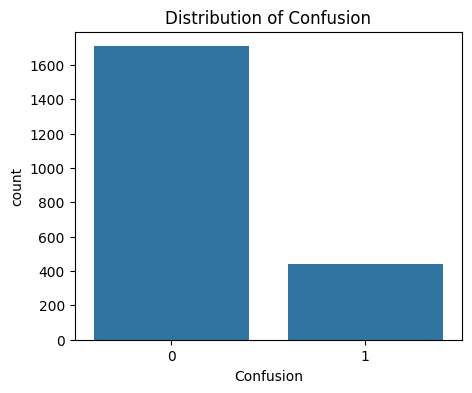

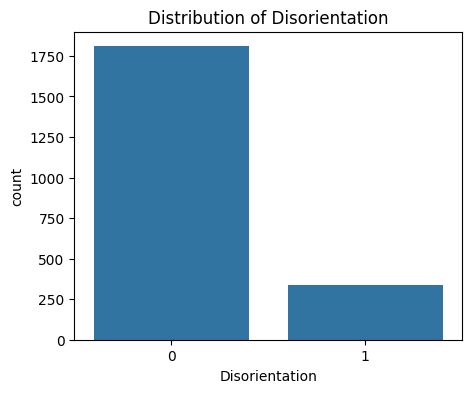

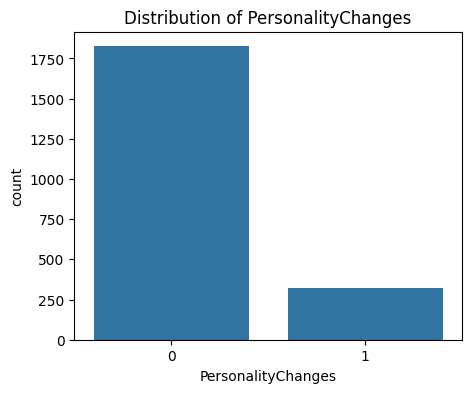

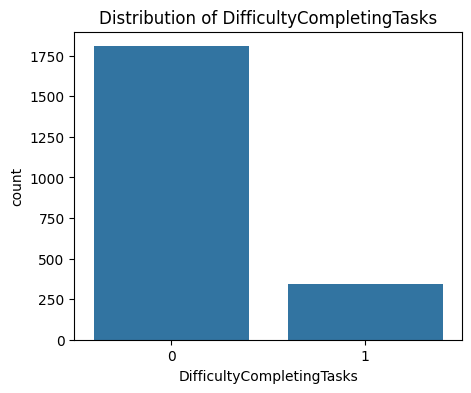

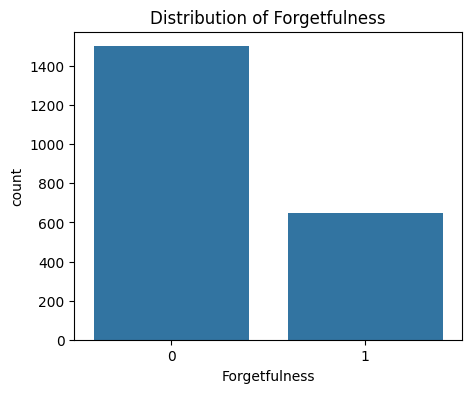

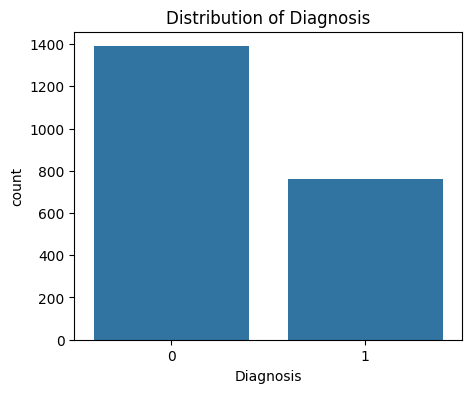

In [12]:
categorical_cols = ['Gender','Ethnicity','EducationLevel','Smoking','FamilyHistoryAlzheimers',
                    'CardiovascularDisease','Diabetes','Depression','HeadInjury',
                    'Hypertension','MemoryComplaints','BehavioralProblems','Confusion',
                    'Disorientation','PersonalityChanges','DifficultyCompletingTasks',
                    'Forgetfulness','Diagnosis']

for col in categorical_cols:
    plt.figure(figsize=(5,4))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.show()


## Interpretation: Categorical Feature Counts
- Gender, EducationLevel, and other binary variables show a balanced distribution.
- Diagnosis counts show how many patients have Alzheimer's vs. do not.
- These distributions help us understand whether the dataset is **balanced or imbalanced**, which is important for modeling.


# Section 6 — Correlation Heatmap
Shows how numerical variables relate to each other and with diagnosis.


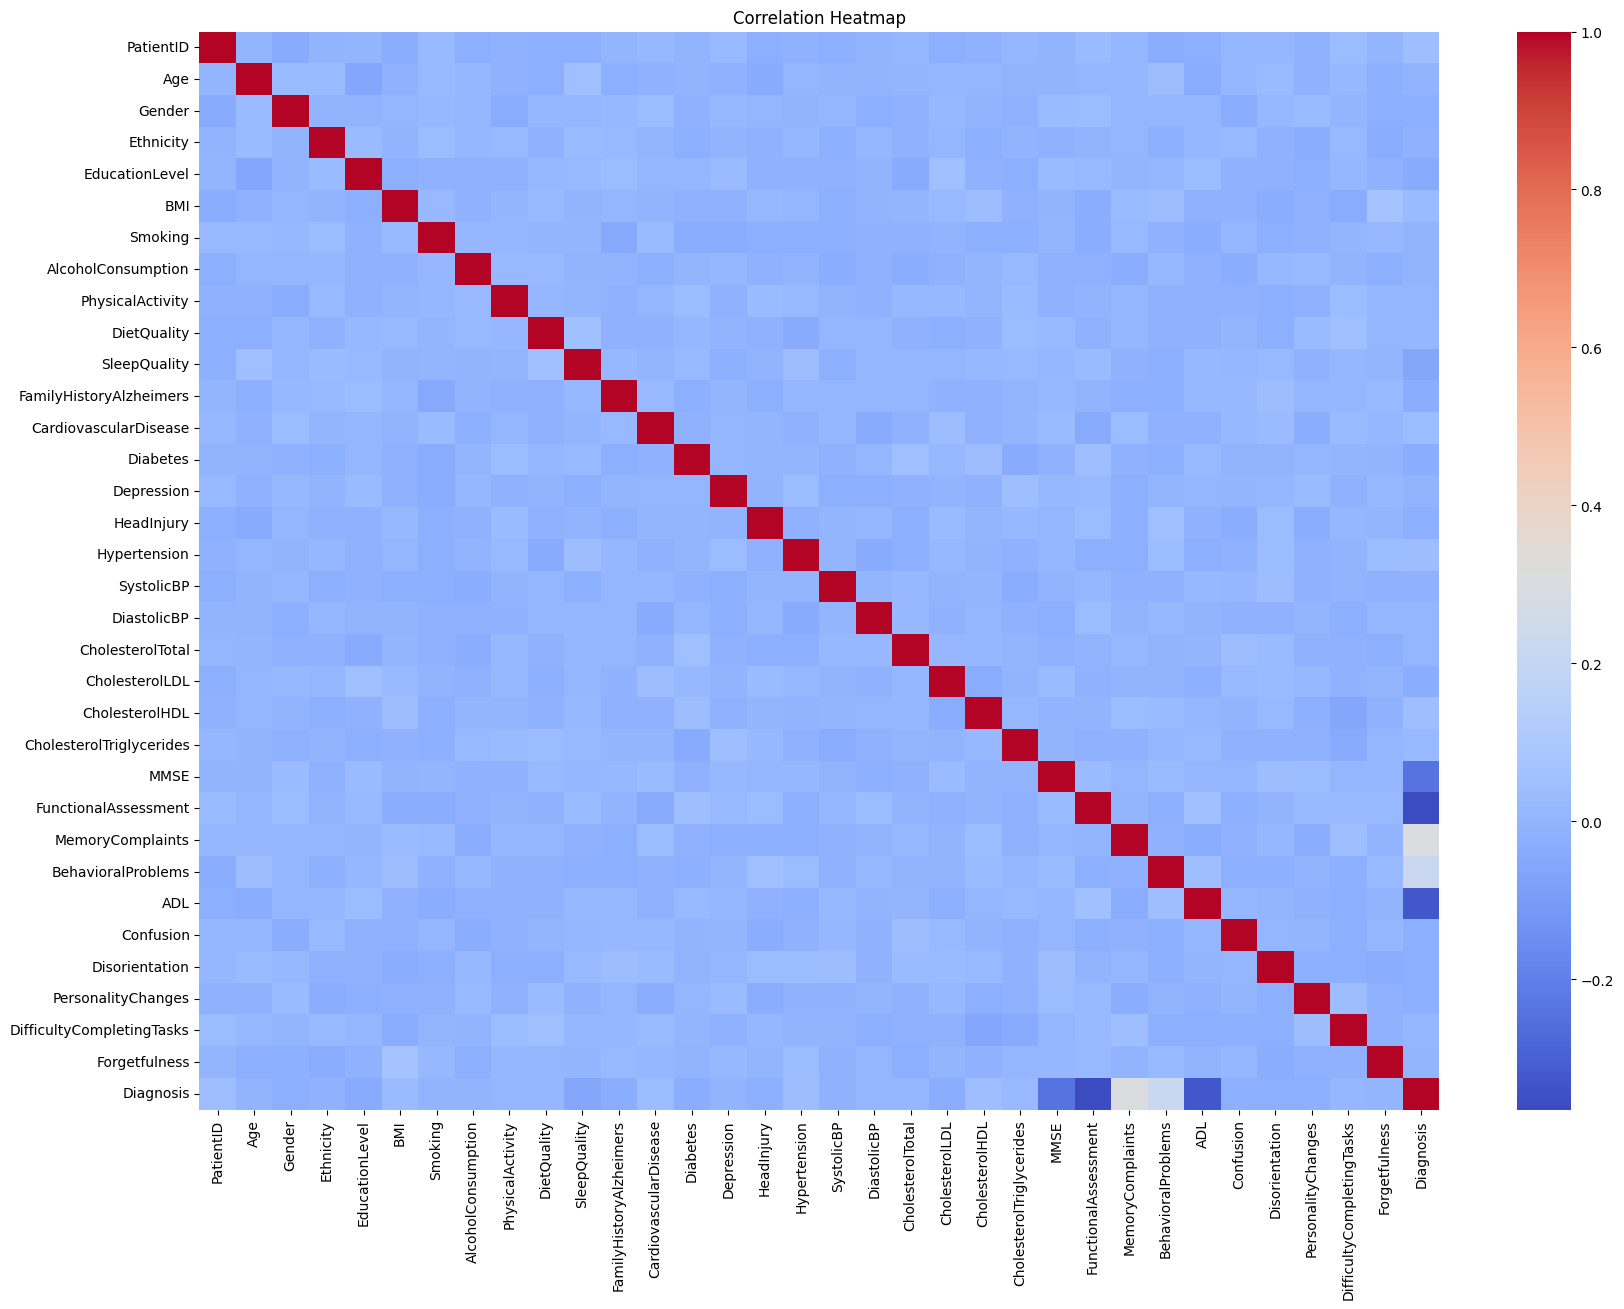

In [13]:
plt.figure(figsize=(20, 14))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


## Interpretation: Correlation Heatmap
- Variables related to **clinical measurements** (blood pressure, cholesterol levels) show moderate correlations with each other.
- No harmful multicollinearity (correlation > 0.9), meaning models like Logistic Regression can still work without issues.


# Section 7 — Bivariate Analysis w.r.t Diagnosis
We examine how each variable differs for:
- Diagnosis = 0 (No Alzheimer's)
- Diagnosis = 1 (Alzheimer's)


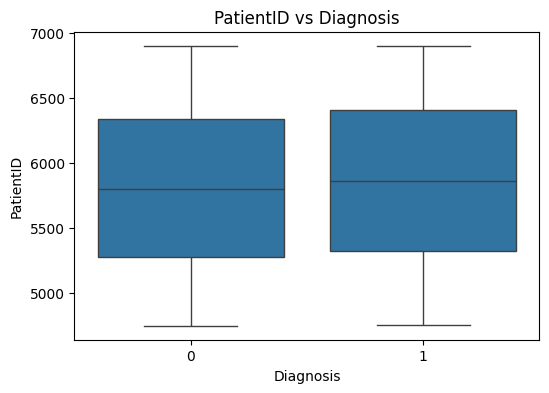

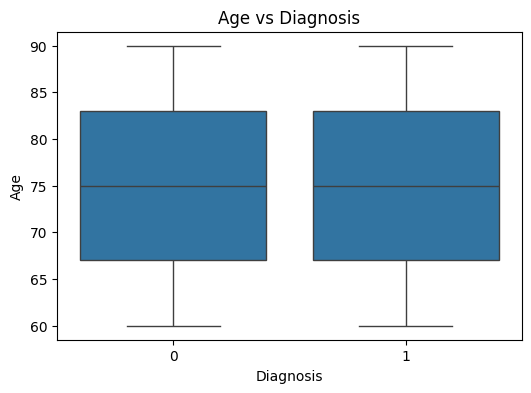

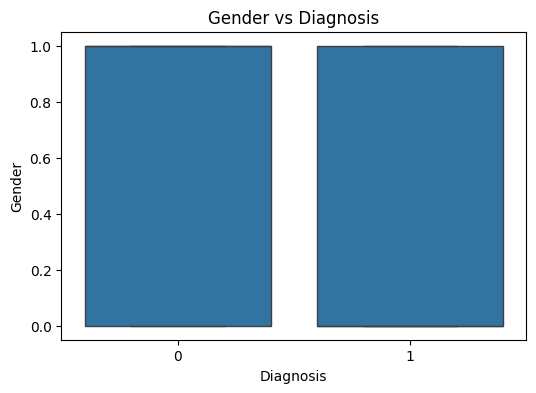

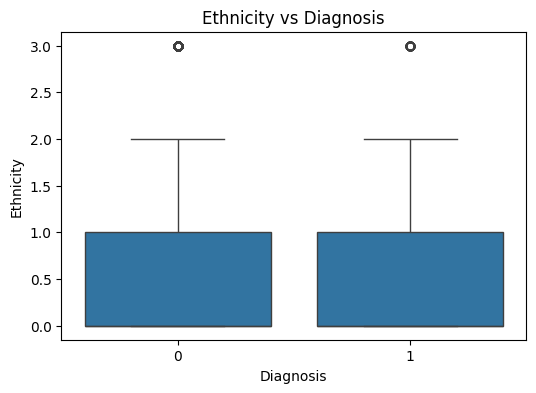

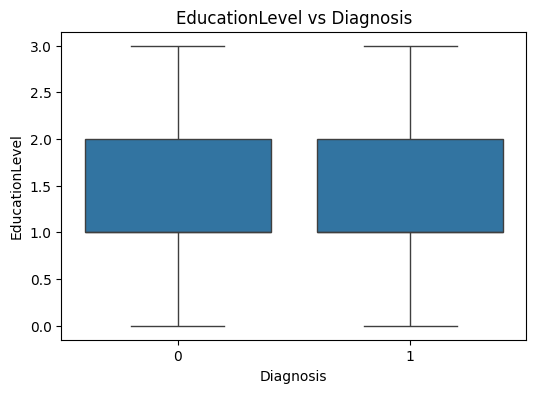

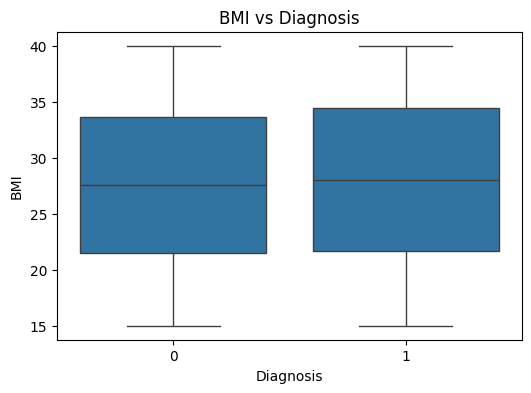

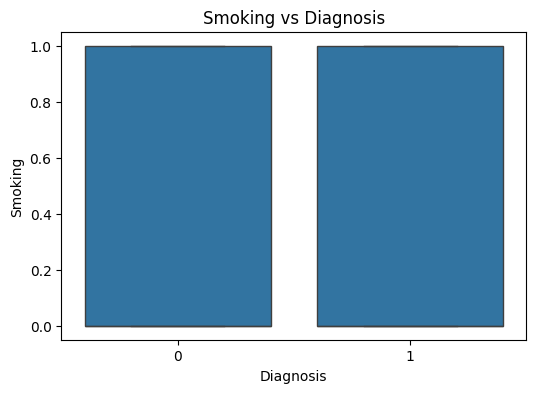

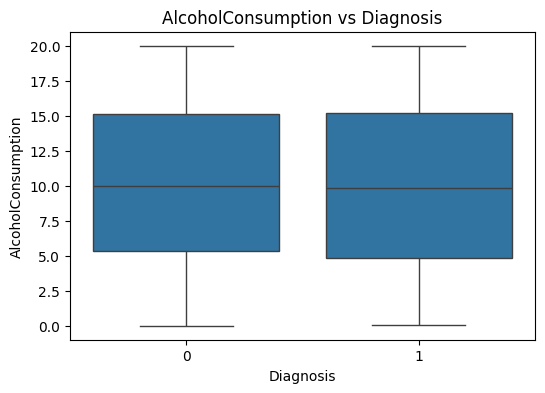

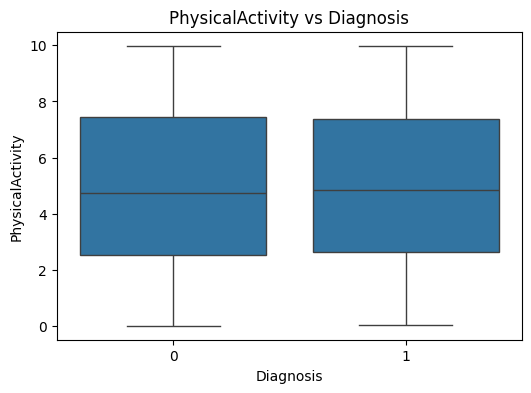

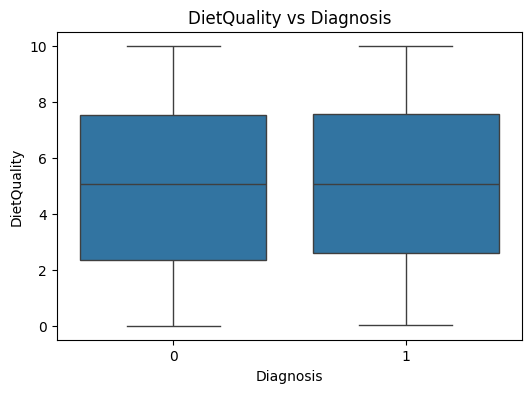

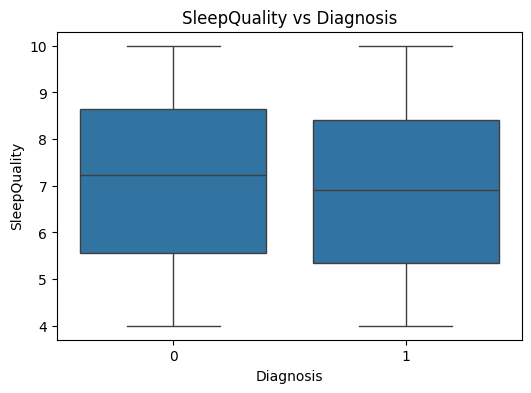

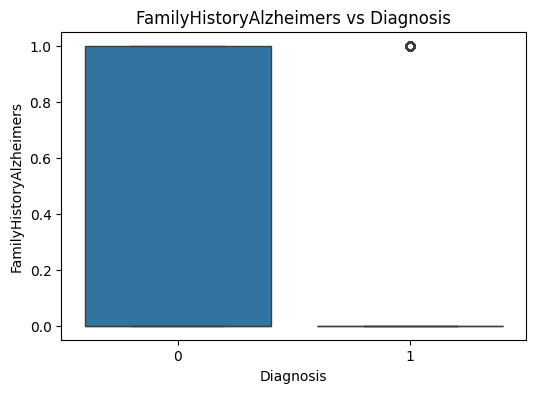

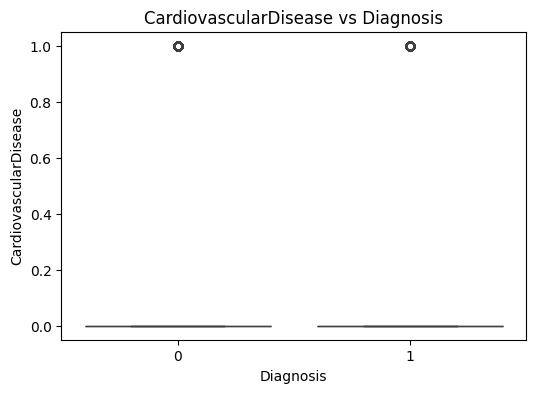

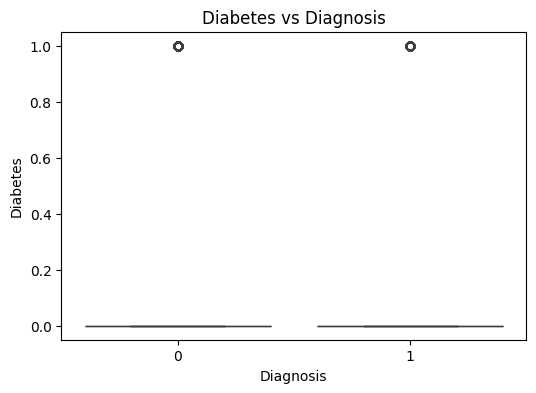

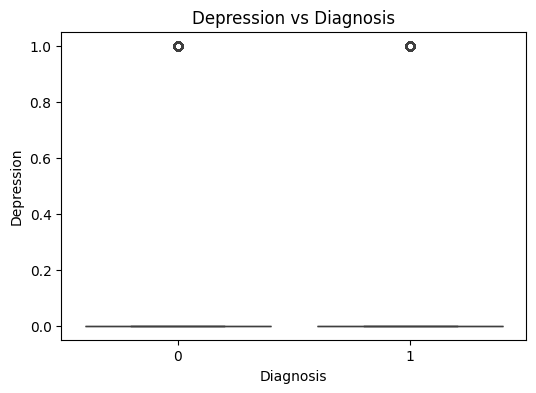

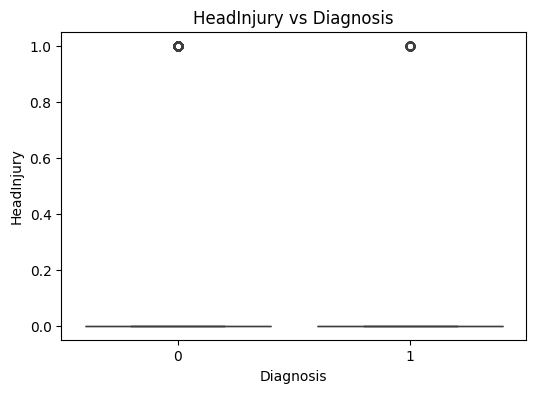

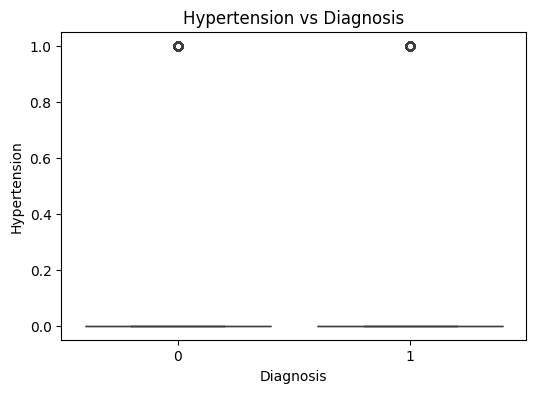

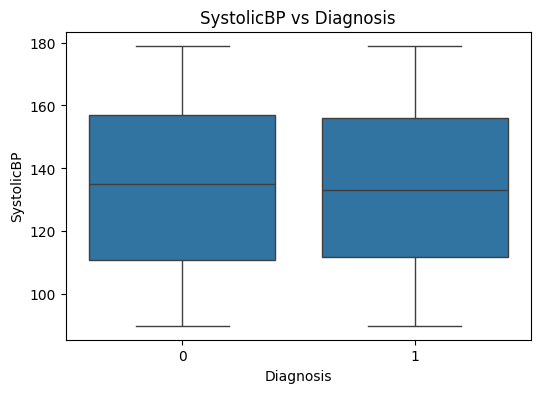

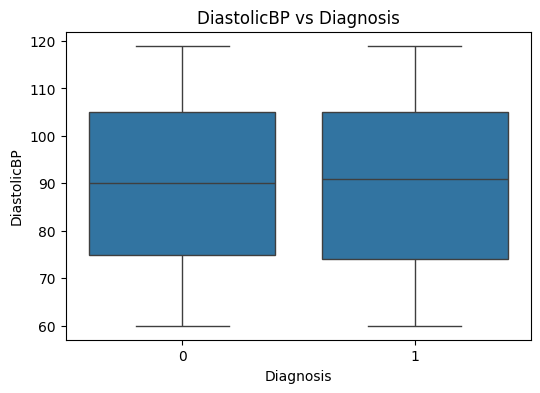

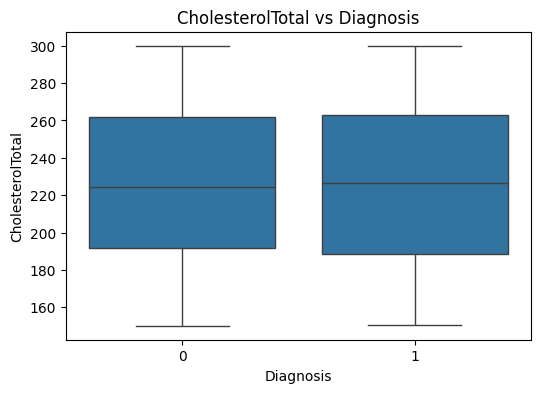

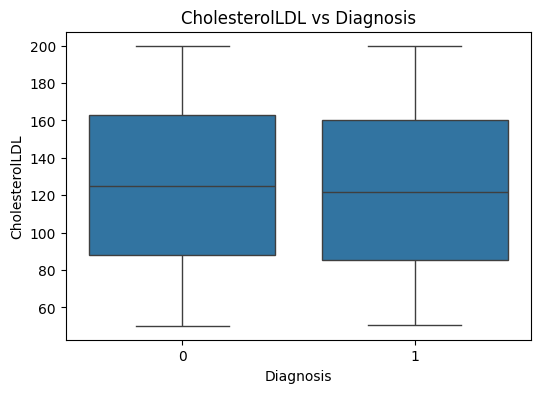

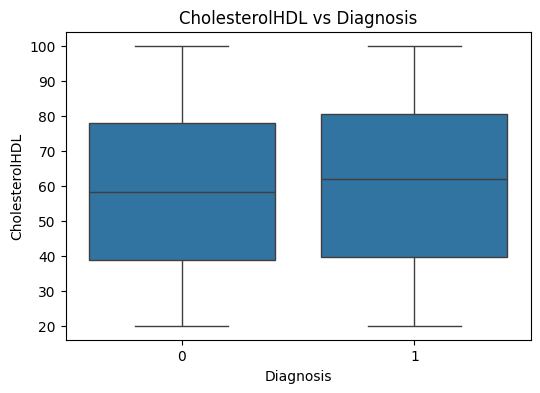

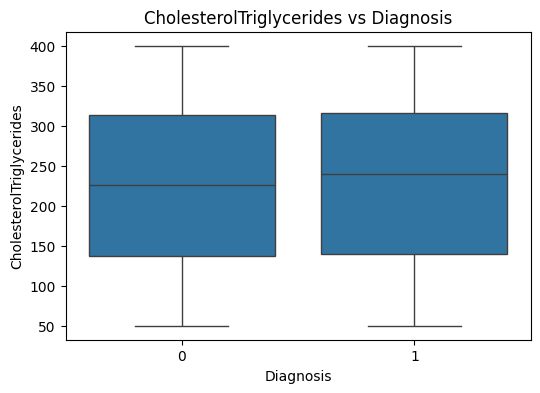

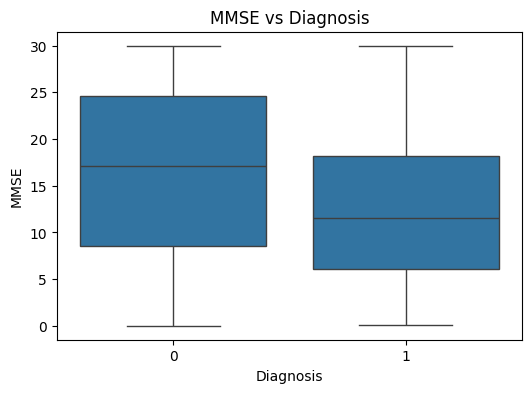

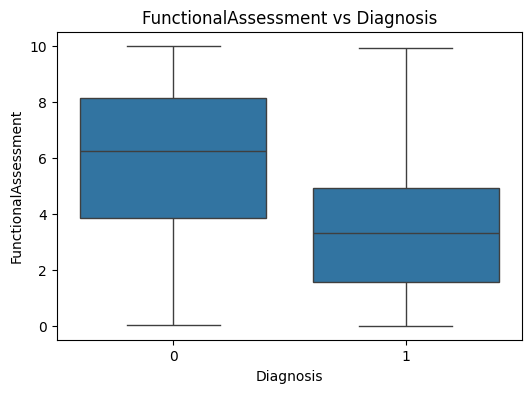

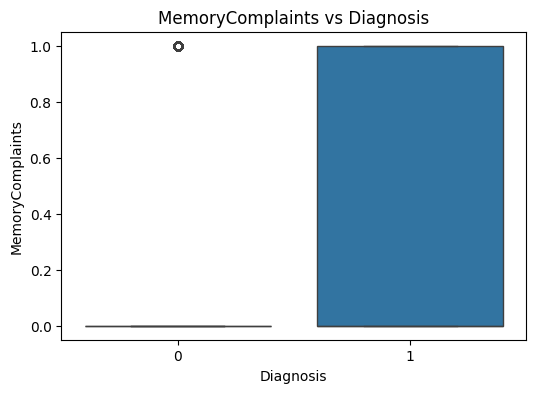

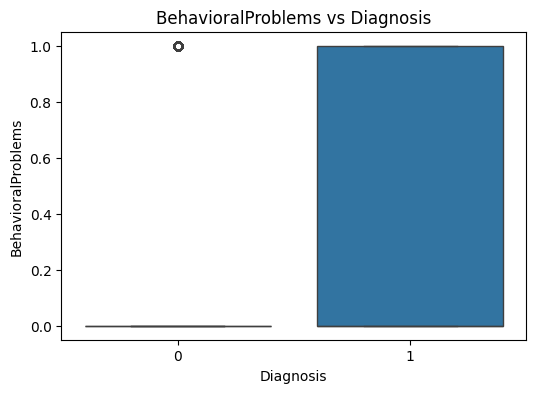

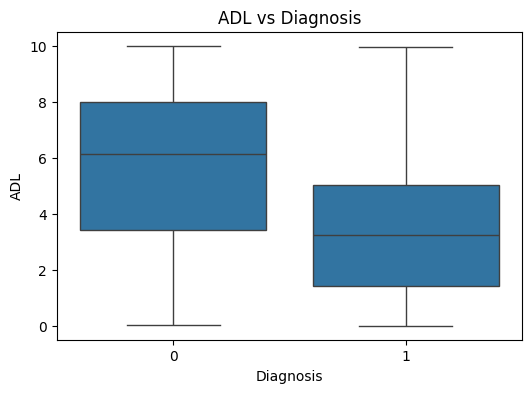

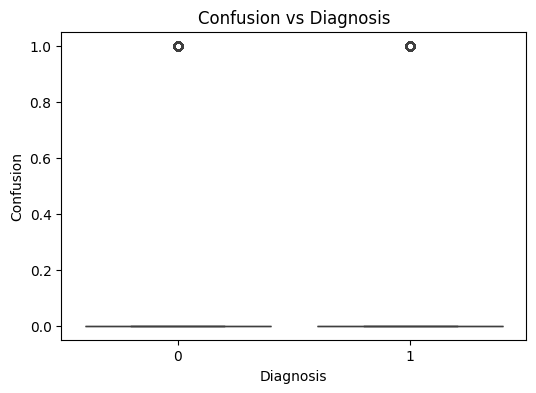

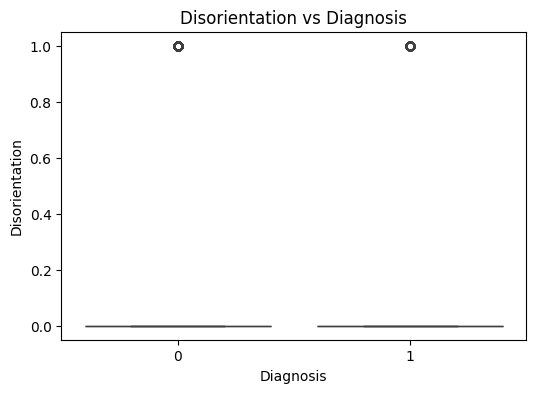

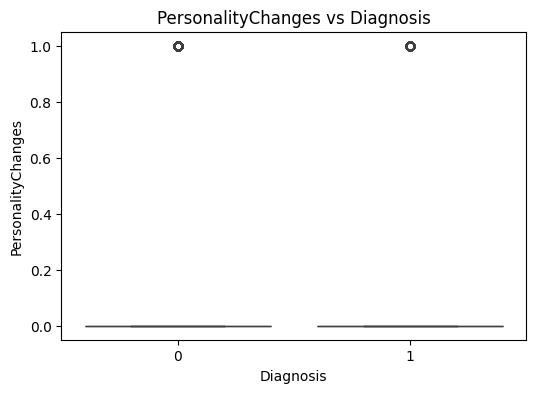

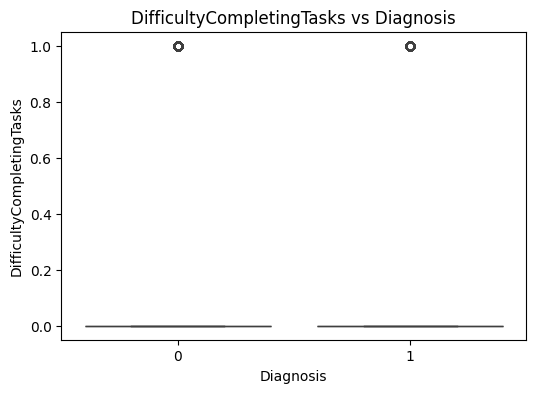

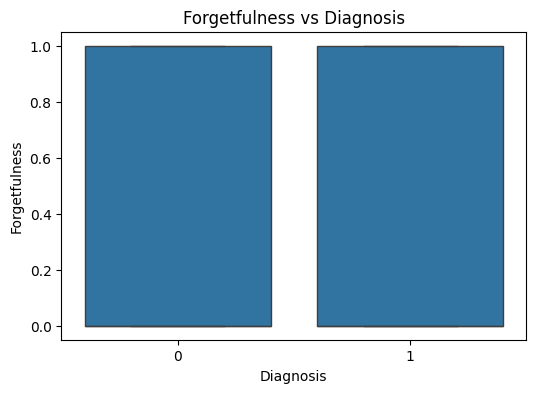

In [14]:
for col in numeric_cols:
    if col != "Diagnosis":
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df['Diagnosis'], y=df[col])
        plt.title(f"{col} vs Diagnosis")
        plt.show()


## Interpretation: Numeric Features vs Diagnosis
- Patients diagnosed with Alzheimer's generally show:
  - **Lower MMSE scores**
  - **Lower ADL & FunctionalAssessment scores**
  - Slightly different clinical measurement patterns
- Clear separation in cognitive scores confirms that cognitive metrics are **important indicators** of Alzheimer's.


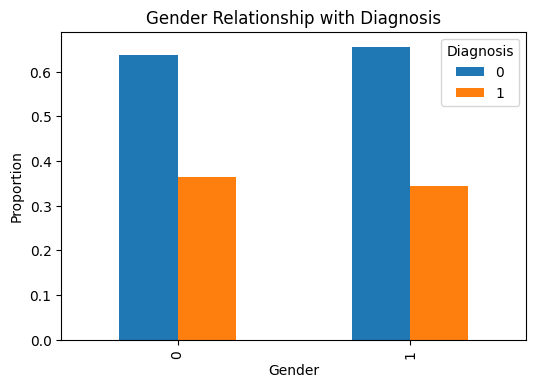

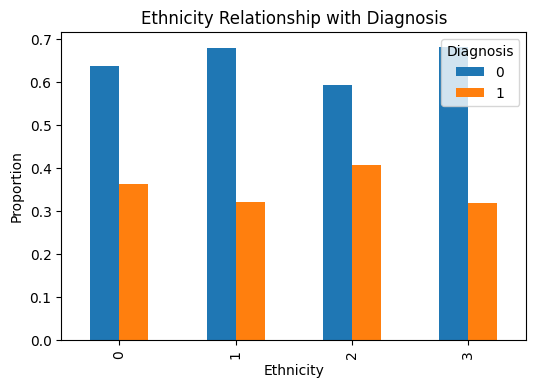

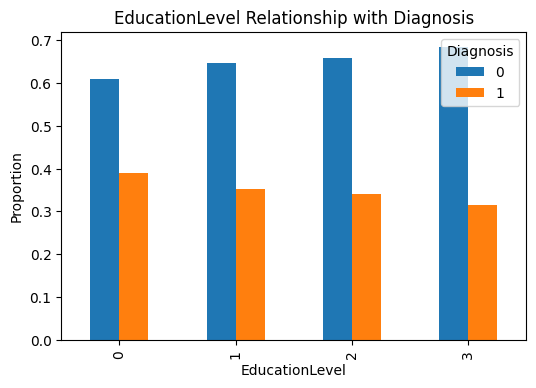

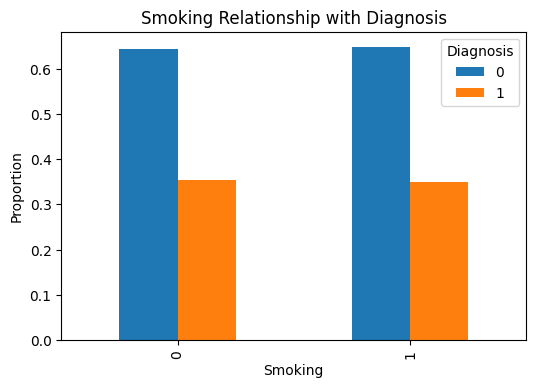

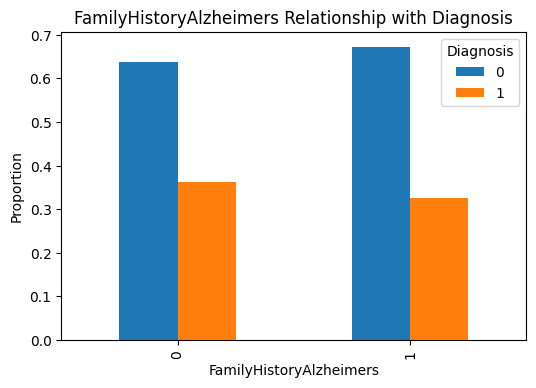

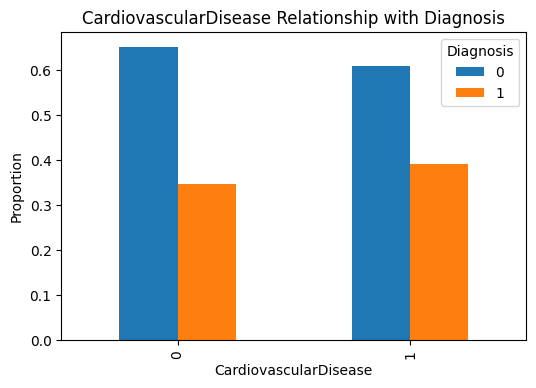

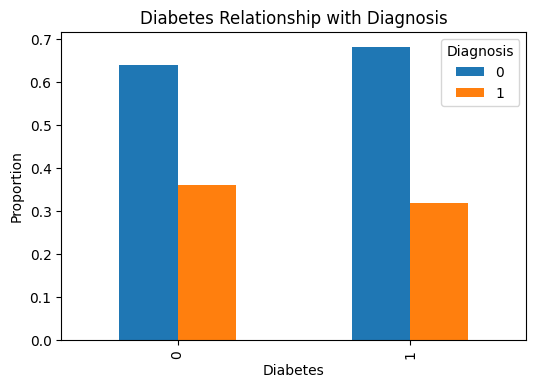

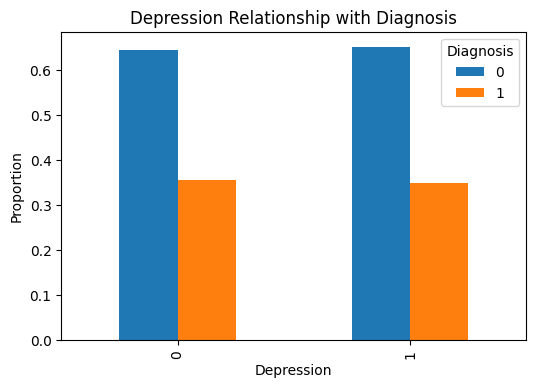

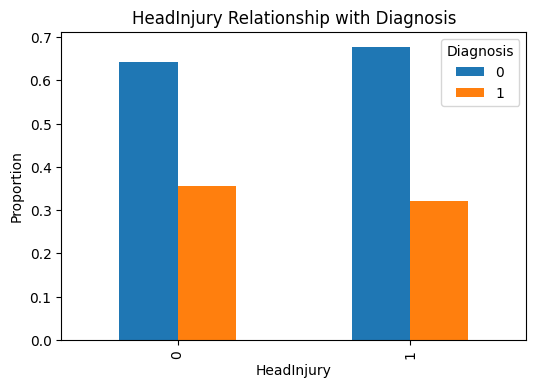

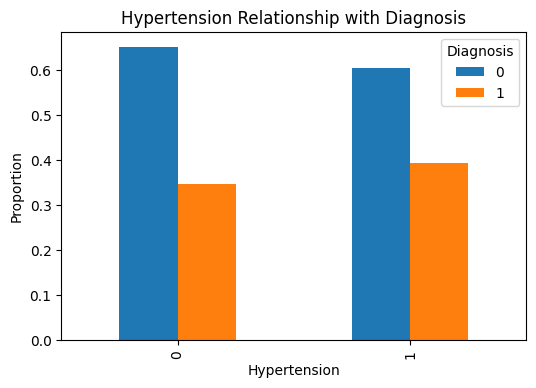

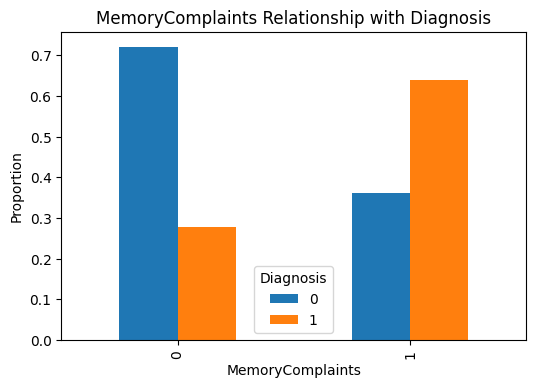

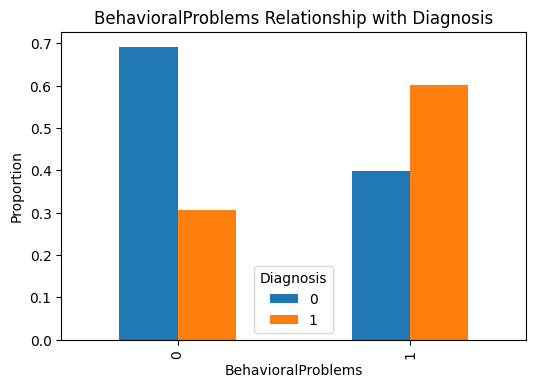

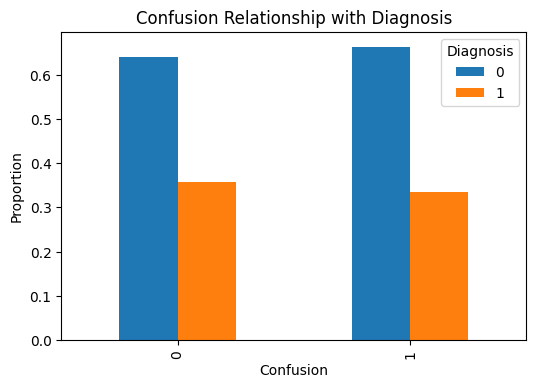

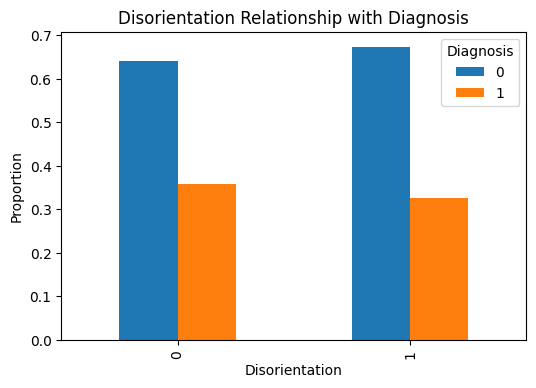

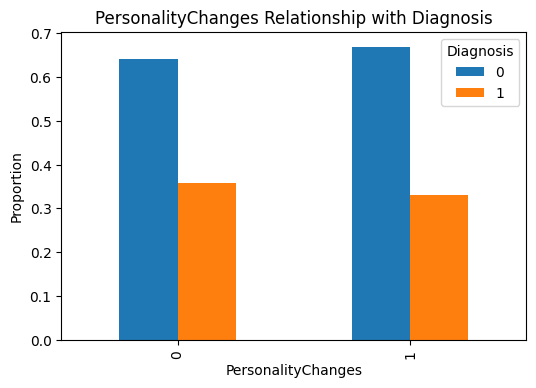

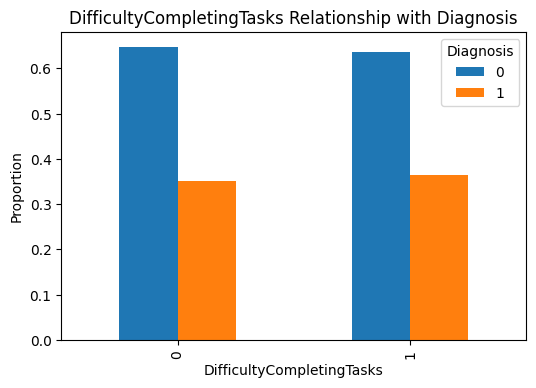

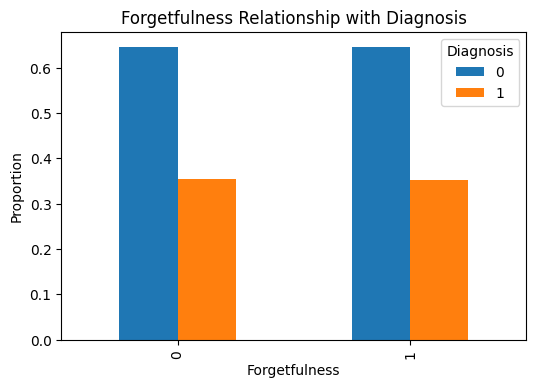

In [15]:
for col in categorical_cols:
    if col != "Diagnosis":
        ct = pd.crosstab(df[col], df['Diagnosis'], normalize='index')
        ct.plot(kind='bar', figsize=(6,4))
        plt.title(f"{col} Relationship with Diagnosis")
        plt.ylabel("Proportion")
        plt.show()


## Interpretation: Categorical Features vs Diagnosis
- Conditions like **Hypertension, Diabetes, Depression, and MemoryComplaints** show different proportions across Diagnosis groups.
- Lifestyle factors such as **Smoking** and **AlcoholConsumption** show minor differences.
- These patterns help identify which binary conditions are associated with higher Alzheimer’s likelihood.


# Section 8 — Outlier Detection
We detect outliers using the IQR method.

In [16]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers.shape[0]

for col in numeric_cols:
    print(col, ":", detect_outliers(col))


PatientID : 0
Age : 0
Gender : 0
Ethnicity : 211
EducationLevel : 0
BMI : 0
Smoking : 0
AlcoholConsumption : 0
PhysicalActivity : 0
DietQuality : 0
SleepQuality : 0
FamilyHistoryAlzheimers : 0
CardiovascularDisease : 310
Diabetes : 324
Depression : 431
HeadInjury : 199
Hypertension : 320
SystolicBP : 0
DiastolicBP : 0
CholesterolTotal : 0
CholesterolLDL : 0
CholesterolHDL : 0
CholesterolTriglycerides : 0
MMSE : 0
FunctionalAssessment : 0
MemoryComplaints : 447
BehavioralProblems : 337
ADL : 0
Confusion : 441
Disorientation : 340
PersonalityChanges : 324
DifficultyCompletingTasks : 341
Forgetfulness : 0
Diagnosis : 0


## Interpretation: Outlier Detection
- Some clinical measurements (e.g., cholesterol and triglycerides) show a few outliers, which is **normal** for medical data.
- Outliers do not appear extreme enough to distort results, so we can either keep them or cap them later during modeling.


# Summary:

**Strong predictors of Alzheimer’s:**

- MMSE score

- Functional assessment

- ADL score

- Memory complaints

- Behavioral issues

- Forgetfulness and disorientation

## Section 9 — Model Training: Logistic Regression

Now, let's prepare the data and train a Logistic Regression model to predict Alzheimer's disease diagnosis.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define features (X) and target (y)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify numerical columns for scaling (excluding 'PatientID' which is an identifier)
# Ensure 'PatientID' is not scaled as it's an identifier
scale_cols = [col for col in X_train.select_dtypes(include=np.number).columns if col not in ['PatientID']]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1504, 33)
X_test shape: (645, 33)
y_train shape: (1504,)
y_test shape: (645,)


Now that the data is split, we will train a Logistic Regression model and evaluate its performance.

In [20]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 0.8062

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       401
           1       0.78      0.68      0.73       244

    accuracy                           0.81       645
   macro avg       0.80      0.78      0.79       645
weighted avg       0.80      0.81      0.80       645


Confusion Matrix:
[[353  48]
 [ 77 167]]


## Section 10 — Model Training: Decision Tree Classifier

Let's now train and evaluate a Decision Tree Classifier to predict Alzheimer's disease diagnosis.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Decision Tree Classifier model
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)

# Make predictions on the test set
dtc_y_pred = dtc_model.predict(X_test)

# Evaluate the model
print("\nDecision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, dtc_y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, dtc_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dtc_y_pred))


Decision Tree Model Evaluation:
Accuracy: 0.9318

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       401
           1       0.93      0.89      0.91       244

    accuracy                           0.93       645
   macro avg       0.93      0.92      0.93       645
weighted avg       0.93      0.93      0.93       645


Confusion Matrix:
[[384  17]
 [ 27 217]]


## Section 11 — Model Training: Random Forest Classifier

Next, we'll train and evaluate a Random Forest Classifier to predict Alzheimer's disease diagnosis.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Random Forest Classifier model
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train, y_train)

# Make predictions on the test set
rfc_y_pred = rfc_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rfc_y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rfc_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rfc_y_pred))


Random Forest Model Evaluation:
Accuracy: 0.9054

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       401
           1       0.95      0.80      0.86       244

    accuracy                           0.91       645
   macro avg       0.92      0.88      0.90       645
weighted avg       0.91      0.91      0.90       645


Confusion Matrix:
[[390  11]
 [ 50 194]]


## Section 12 — Model Training: Support Vector Machine (SVM) Classifier

Next, we'll train and evaluate a Support Vector Machine (SVM) Classifier to predict Alzheimer's disease diagnosis.

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the SVM Classifier model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test)

# Evaluate the model
print("\nSVM Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, svm_y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, svm_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svm_y_pred))


SVM Model Evaluation:
Accuracy: 0.6217

Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       401
           1       0.00      0.00      0.00       244

    accuracy                           0.62       645
   macro avg       0.31      0.50      0.38       645
weighted avg       0.39      0.62      0.48       645


Confusion Matrix:
[[401   0]
 [244   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Section 13 — Model Training: Gaussian Naive Bayes Classifier

Next, we'll train and evaluate a Gaussian Naive Bayes Classifier to predict Alzheimer's disease diagnosis.

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
nb_y_pred = nb_model.predict(X_test)

# Evaluate the model
print("\nGaussian Naive Bayes Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, nb_y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, nb_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nb_y_pred))


Gaussian Naive Bayes Model Evaluation:
Accuracy: 0.8062

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       401
           1       0.77      0.69      0.73       244

    accuracy                           0.81       645
   macro avg       0.80      0.78      0.79       645
weighted avg       0.80      0.81      0.80       645


Confusion Matrix:
[[352  49]
 [ 76 168]]


## Section 14 — Model Training: K-Nearest Neighbors (KNN) Classifier

Next, we'll train and evaluate a K-Nearest Neighbors (KNN) Classifier to predict Alzheimer's disease diagnosis.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the KNN Classifier model (using default n_neighbors=5)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_y_pred = knn_model.predict(X_test)

# Evaluate the model
print("\nKNN Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, knn_y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, knn_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, knn_y_pred))


KNN Model Evaluation:
Accuracy: 0.6109

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.80      0.72       401
           1       0.48      0.30      0.37       244

    accuracy                           0.61       645
   macro avg       0.56      0.55      0.54       645
weighted avg       0.59      0.61      0.59       645


Confusion Matrix:
[[321  80]
 [171  73]]


## Section 15 — Model Training: Gradient Boosting Classifier

Next, we'll train and evaluate a Gradient Boosting Classifier to predict Alzheimer's disease diagnosis.

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Gradient Boosting Classifier model
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train, y_train)

# Make predictions on the test set
gbc_y_pred = gbc_model.predict(X_test)

# Evaluate the model
print("\nGradient Boosting Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, gbc_y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, gbc_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, gbc_y_pred))


Gradient Boosting Model Evaluation:
Accuracy: 0.9535

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       401
           1       0.95      0.93      0.94       244

    accuracy                           0.95       645
   macro avg       0.95      0.95      0.95       645
weighted avg       0.95      0.95      0.95       645


Confusion Matrix:
[[388  13]
 [ 17 227]]


## Section 16 — Feature Importance for Gradient Boosting Classifier

Let's analyze the feature importance from our best-performing model, the Gradient Boosting Classifier, to understand which variables contribute most to the prediction of Alzheimer's disease.

/tmp/ipython-input-551865575.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')


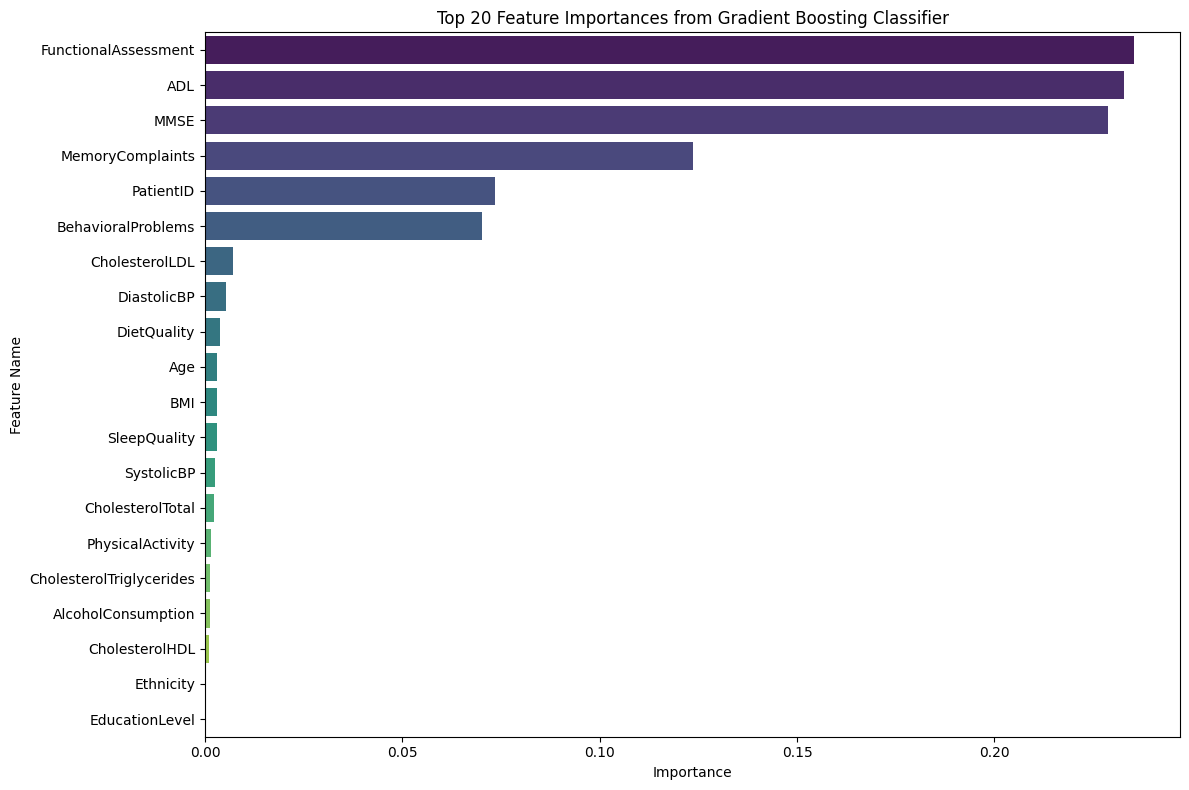


Top 10 most important features:
                  Feature  Importance
24  FunctionalAssessment    0.235273
27                   ADL    0.232858
23                  MMSE    0.228709
25      MemoryComplaints    0.123617
0              PatientID    0.073468
26    BehavioralProblems    0.070222
20        CholesterolLDL    0.006980
18           DiastolicBP    0.005401
9            DietQuality    0.003714
1                    Age    0.003007


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained Gradient Boosting model
feature_importances = gbc_model.feature_importances_

# Get feature names from the training data
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances from Gradient Boosting Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

print("\nTop 10 most important features:\n", importance_df.head(10))